# Brayan Alejandro Murillo González 


In [1]:
import numpy as np
import scipy as sc
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg as la 
from scipy.interpolate import interp1d
import scipy.optimize as optimize
import scipy.interpolate as interpolate
from numpy.polynomial import Polynomial

1. Elaborar una gráfica de la densidad como función de la altura.

$$ \rho=\rho_0e^{\frac{-y}{\lambda}} $$
donde:

$\rho_0 = 1.29\  kg /m^3$\
$\lambda = 7482.2\ m $

In [2]:
ρ0 = 1.29  # Densidad del aire sobre el nivel del mar

λ = 7482.2 

ρ = lambda y: ρ0*np.exp(-y/λ)  # Función de densidad 

y = np.linspace(0,10000, 100000) # Valores de altura para evaluar la función de densidad


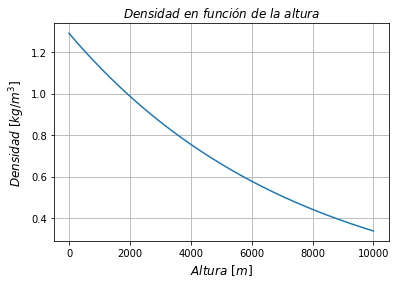

In [3]:
# Grafica de la densidad en funcion de la altura

plt.plot(y,ρ(y))
plt.xlabel("$Altura\ [m]$", fontsize=12)
plt.ylabel("$Densidad\ [kg/m^3] $", fontsize=12)
plt.title("$Densidad\ en\ función\ de\ la\ altura$")
plt.grid()

2.     Diseñar un programa que resuelva la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros:

$m=60kg$, $A=0.3m^2$, $h=30km$.\
$m=60kg$, $A=0.3m^2$, $h=40km$.\
$m=60kg$, $A=0.3m^2$, $h=50km$.\
$m=60kg$, $A=0.3m^2$, $h=60km$.\
$m=60kg$, $A=0.3m^2$, $h=70km$.


$$\frac{d^2y}{dt^2}=-g+\frac{k_{0}}{m}v^{2}e^{\frac{-y}{\lambda}}$$

donde:

$k_0 = \frac{\rho_0A\delta}{2} $

In [4]:
A = 0.3     # Area transversal del paracaidista
m = 60      # Masa del paracaidista
δ = 0.8     # Coeficiente de fricción del aire
g = 9.8     # Aceleracion de la gravedad
ρ0 = 1.29   # Densidad del aire sobre el nivel del mar
λ = 7482.2 

params=[m,A,g,δ,ρ0,λ]  # Parametros del problema 

In [5]:
# Función para calcular la ED

def f(y,t,params):
  
  m = params[0]
  A = params[1]
  g = params[2]          
  δ = params[3]
  ρ_0 = params[4]       
  λ = params[5]
  k_0 = (0.5)* ρ_0*A*δ  

  dydt = y[1]
  dvdt = -g+(k_0/m)*y[1]**2*np.exp(-y[0]/λ)
  return[dydt,dvdt]

In [6]:
t = np.linspace(0,250,10000) # Tiempos de integracion 

h = [30e3,40e3,50e3,60e3,70e3] # Alturas iniciales

v0 = 0    # Velocidad inicial

pos = []  # Arreglo para almacenar las soluciones de las ecuaciones diferenciales variando la altura inicial


# Ciclo para evaluar la ecuacion diferencial con distintas alturas iniciales

for i in range(0,len(h)):

  y =[h[i],v0] # Condiciones iniciales del problema

  pos.append(odeint(f , y , t , args=(params,)))
  


In [7]:
# Se almacenan las soluciones en distinto arreglos para trabajar mas cómodamente

y1 = pos[0][:,0] # Posiciones cuando la altura inicial es de 30000 [m]
v1 = pos[0][:,1] # Velocidades cuando la altura inicial es de 30000 [m]

y2 = pos[1][:,0] # Posiciones cuando la altura inicial es de 40000 [m]
v2 = pos[1][:,1] # Velocidades cuando la altura inicial es de 40000 [m] 

y3 = pos[2][:,0] # Posiciones cuando la altura inicial es de 50000 [m]
v3 = pos[2][:,1] # Velocidades cuando la altura inicial es de 50000 [m]

y4 = pos[3][:,0] # Posiciones cuando la altura inicial es de 60000 [m]
v4 = pos[3][:,1] # Velocidades cuando la altura inicial es de 60000 [m]

y5 = pos[4][:,0] # Posiciones cuando la altura inicial es de 70000 [m]
v5 = pos[4][:,1] # Velocidades cuando la altura inicial es de 70000 [m]




# Se almacenan los valores de posiciones y velocidades en dos listas para usarlos más adelante
vs = [v1,v2,v3,v4,v5] 
xs = [y1,y2,y3,y4,y5]

# Graficas

Para las graficas de velocidad, como la velocidad es un vector que apunta hacia abajo, y analíticamente para llegar a la eq diferencial de movimiento se toma el sistema de referencia en el que todo lo que apunte hacia abajo es negativo, por tanto las velocidades despues de $t=0$ serán negativas, para visualizar mejor las graficas de velociad, se multiplicó las velocidades por $-1$ 

---



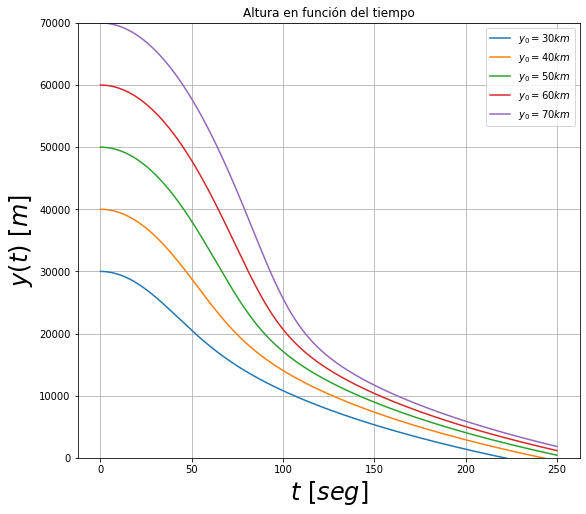

In [8]:
# Grafica de las alturas en función del tiempo para cada altura inicial

plt.figure(figsize=(9,8))
plt.title("Altura en función del tiempo") # Titulo de la gráfica

plt.plot(t, y1 , label = "$y_0 = 30km $") # posicion en funcion del tiempo para Y_0 = 30km
plt.plot(t, y2 , label = "$y_0 = 40km $") # posicion en funcion del tiempo para Y_0 = 40km
plt.plot(t, y3 , label = "$y_0 = 50km $") # posicion en funcion del tiempo para Y_0 = 50km
plt.plot(t, y4 , label = "$y_0 = 60km $") # posicion en funcion del tiempo para Y_0 = 60km
plt.plot(t, y5 , label = "$y_0 = 70km $") # posicion en funcion del tiempo para Y_0 = 70km

plt.xlabel("$t\ [seg]$" , fontsize = 24)    # nombre del eje x
plt.ylabel("$y(t)\ [m]$" , fontsize = 24)   # nombre del eje y
plt.ylim(0 , 70000)
plt.legend()
plt.grid()

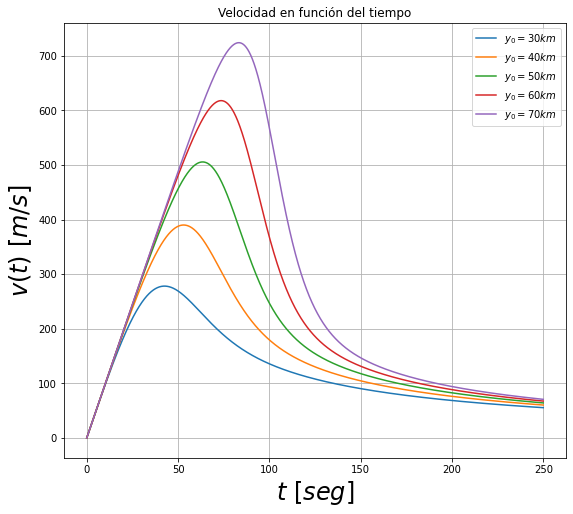

In [9]:
# Grafica de las velocidades en función del tiempo para cada altura inicial

plt.figure(figsize=(9,8))
plt.title("Velocidad en función del tiempo") # Titulo de la gráfica

plt.plot(t , -v1 , label = "$y_0 = 30km $") # velocidad en funcion del tiempo para Y_0 = 30km
plt.plot(t , -v2 , label = "$y_0 = 40km $") # velocidad en funcion del tiempo para Y_0 = 40km
plt.plot(t , -v3 , label = "$y_0 = 50km $") # velocidad en funcion del tiempo para Y_0 = 50km
plt.plot(t , -v4 , label = "$y_0 = 60km $") # velocidad en funcion del tiempo para Y_0 = 60km
plt.plot(t , -v5 , label = "$y_0 = 70km $") # velocidad en funcion del tiempo para Y_0 = 70km


plt.xlabel("$t\ [seg]$" , fontsize = 24)    # nombre del eje x
plt.ylabel("$v(t)\ [m/s]$" , fontsize = 24) # nombre del eje y
plt.legend()
plt.grid()
plt.show()

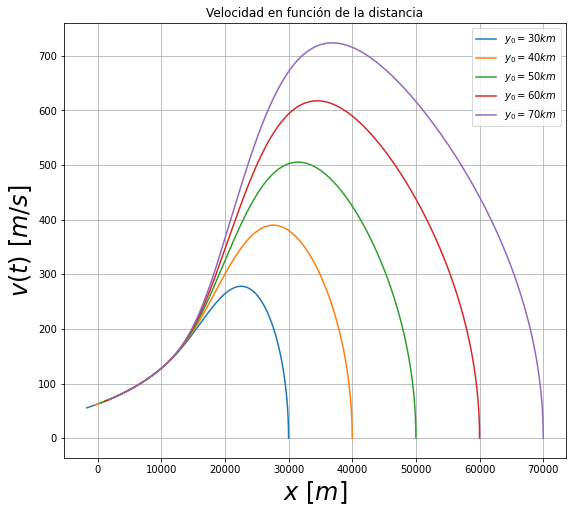

In [10]:
# Grafica de las velocidades en función de la altura para cada altura inicial

plt.figure(figsize=(9,8))
plt.title("Velocidad en función de la distancia") # Titulo de la gráfica

plt.plot(y1 , -v1 , label = "$y_0 = 30km $") # velocidad en funcion del tiempo para Y_0 = 30km
plt.plot(y2 , -v2 , label = "$y_0 = 40km $") # velocidad en funcion del tiempo para Y_0 = 40km
plt.plot(y3 , -v3 , label = "$y_0 = 50km $") # velocidad en funcion del tiempo para Y_0 = 50km
plt.plot(y4 , -v4 , label = "$y_0 = 60km $") # velocidad en funcion del tiempo para Y_0 = 60km
plt.plot(y5 , -v5 , label = "$y_0 = 70km $") # velocidad en funcion del tiempo para Y_0 = 70km

plt.xlabel("$x\ [m]$" , fontsize = 24)    # nombre del eje x
plt.ylabel("$v(t)\ [m/s]$" , fontsize = 24) # nombre del eje y
plt.legend()
plt.grid()
plt.show()

# Velocidades máximas numéricas

In [11]:
""" Para calcular las velocidades máximas numericamente, se procede a calcular el polinomio de interpolacion
    para cada conjunto de datos de altura y velocidad, luego se minimiza ese polinomio con signo negativo
    y este "minimo" corresponderá al valor de altura en el que se alcanza la velocidad máxima """


p = []              # Arreglo para almacenar los polinomios    
mini = np.zeros(5)  # Arreglo para almacenar la altura en la que se alcanza la velocidad maxima
maxi = np.zeros(5)  # Arreglo para almacenar la velocidad máxima


""" Ciclo para evaluar cada conjunto de datos de altura y velocidad, (cada xs[i],vs[i] corresponde al conjunto de datos
    con las distintas condiciones iniciales, por ejemplo,  xs[0],vs[0] corresponden a los datos de altura y velocidad
    para la condicion inicial y0= 30000, y asi sucesivamente"""


for i in range(0,5):

  l = interpolate.interp1d(xs[i],vs[i])   # Polinomio de interpolación
  p.append(l)
  m = optimize.fminbound(l,0,h[i])    # Valor de la altura donde se alcanza la velocidad máxima
  mini[i]=m
  M = abs(l(m))    # Velocidad máxima
  maxi[i] = M


""" Almacenamos los datos en un DataFrame"""
df = pd.DataFrame()
df["Altura inicial [m]"] = h
df["Vmax_Num[m/s]"] = maxi
df["Altura  [m] "] = mini

df

,Altura inicial [m],Vmax_Num[m/s],Altura [m]
0,30000.0,278.163983,22548.555519
1,40000.0,390.008116,27607.985021
2,50000.0,505.472416,31487.297433
3,60000.0,617.714110,34485.850501
4,70000.0,723.799559,36865.472856


______________________________________________________________________________
#Velocidades máximas analíticas

Se tiene que la velocidad maxima analíticamente está dada por :

$$ v_m = \sqrt{\frac{v_l^2}{e^{\frac{-ym}{\lambda}}}}$$

donde:
$v_l=\sqrt{\frac{mg}{k_o}}$

\
$y_m$ :   Altura donde se alcanza la velocidad máxima


In [12]:
#parametros necesarios para hallar la velocidad maxima analíticamente

m = params[0]
A = params[1]
g = params[2]          
δ = params[3]
ρ0 = params[4]

k_0 = (0.5)* ρ0*A*δ

# Velocidad límite
vl= np.sqrt((m*g)/k_0)

# Función de velocidad máxima
def vmax(ym): 
  return np.sqrt((vl**2)/(np.exp(-ym/λ)))

vmaxanali = np.zeros(5)  # Array para almacenar cada valor de velocidad máxima

ym = mini   # Alturas a las que se alcanza la velocidad máxima

# Ciclo para evaluar cada velocidad máxima dependiendo del ym
for i in range(0,5):
  vmaxanali[i] = vmax( ym[i] )


# Se almacenan los datos en el dataframe previamente creado
df["Vmax-Analit [m/s]"] = vmaxanali
df

,Altura inicial [m],Vmax_Num[m/s],Altura [m],Vmax-Analit [m/s]
0,30000.0,278.163983,22548.555519,278.101829
1,40000.0,390.008116,27607.985021,389.975944
2,50000.0,505.472416,31487.297433,505.385314
3,60000.0,617.714110,34485.850501,617.513075
4,70000.0,723.799559,36865.472856,723.947689


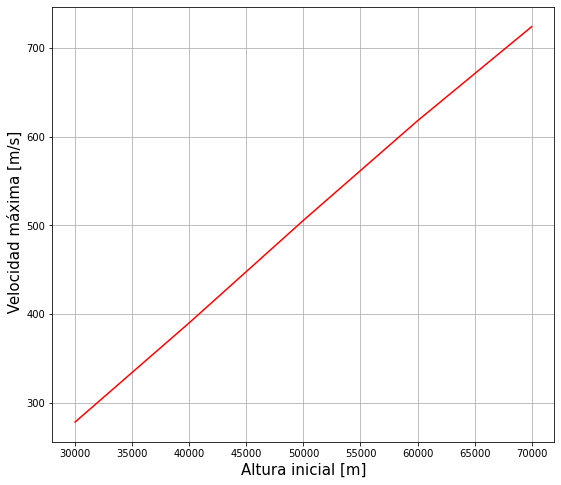

In [13]:
# Grafica de velocidad máxima en función de la altura de caida
plt.figure(figsize=(9,8))
plt.plot(h,maxi, color="red")
plt.xlabel("Altura inicial [m]", fontsize=15)
plt.ylabel(" Velocidad máxima [m/s]", fontsize=15)
plt.grid()


# RETO


$$\frac{d^2y}{dt^2}=-\frac{GM}{(R+y)^2}+\frac{k_{0}}{m}v^{2}e^{\frac{-y}{\lambda}}$$

donde:

$G=6.67*10^{-11}\ Nm^2/kg$\
$M=5.98*10^{24}\ kg$\
$R=6371\ km$

In [14]:
# parametros del problema

ρ_0 = 1.29   # Densidad del aire al nivel del mar
λ = 7482.2 
G = 6.67e-11 # Constante gravitacional
M = 5.98E24   # Masa de la Tierra
R = 6371000    # Radio de la Tierra
m = 60    # Masa del paracaidista
A = 0.3   # Area transversal del paracaidista
g = 9.8    # Aceleración de la gravedad 
δ = 0.8   # coeficiente de rozamiento del aire




params=[ρ0,λ,G,M,R,m,A,g,δ,ρ_0]  # Parametros del problema

In [15]:
# Función para calcular la ED

def f2(y,t,params):
  
  ρ0 = params[0]
  λ = params[1]
  G = params[2]
  M = params[3]
  R = params[4]
  m = params[5]
  A = params[6]
  g = params[7]
  δ = params[8]

  k_0 = (0.5)* ρ_0*A*δ


  dydt = y[1]  
  dvdt = -((G*M)/(R+y[0])**2)+(k_0/m)*y[1]**2*np.exp(-y[0]/λ)
  return[dydt,dvdt]

In [16]:
t = np.linspace(0,250,10000) # Tiempos de integracion 

h = [30e3,40e3,50e3,60e3,70e3] # Alturas iniciales

v0 = 0    # Velocidad inicial

pos = []  # Arreglo para almacenar las soluciones de las ecuaciones diferenciales variando la altura inicial


# Ciclo para evaluar la ecuacion diferencial con distintas alturas iniciales

for i in range(0,len(h)):

  y =[h[i],v0] # Condiciones iniciales del problema

  pos.append(odeint(f2 , y , t , args=(params,)))


In [17]:
# Se almacenan las soluciones en distinto arreglos para trabajar mas cómodamente

y1 = pos[0][:,0] # Posiciones cuando la altura inicial es de 30000 [m]
v1 = pos[0][:,1] # Velocidades cuando la altura inicial es de 30000 [m]

y2 = pos[1][:,0] # Posiciones cuando la altura inicial es de 40000 [m]
v2 = pos[1][:,1] # Velocidades cuando la altura inicial es de 40000 [m] 

y3 = pos[2][:,0] # Posiciones cuando la altura inicial es de 50000 [m]
v3 = pos[2][:,1] # Velocidades cuando la altura inicial es de 50000 [m]

y4 = pos[3][:,0] # Posiciones cuando la altura inicial es de 60000 [m]
v4 = pos[3][:,1] # Velocidades cuando la altura inicial es de 60000 [m]

y5 = pos[4][:,0] # Posiciones cuando la altura inicial es de 70000 [m]
v5 = pos[4][:,1] # Velocidades cuando la altura inicial es de 70000 [m]

vs = [v1,v2,v3,v4,v5]
ys = [y1,y2,y3,y4,y5]

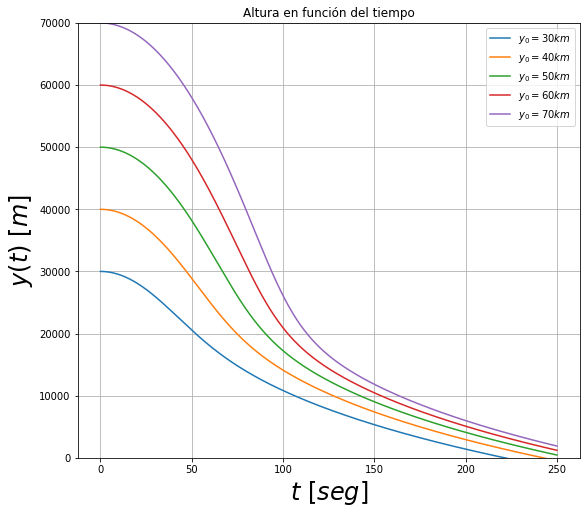

In [18]:

plt.figure(figsize=(9,8))
plt.title("Altura en función del tiempo") # Titulo de la gráfica

plt.plot(t, y1 , label = "$y_0 = 30km $") # posicion en funcion del tiempo para Y_0 = 30km
plt.plot(t, y2 , label = "$y_0 = 40km $") # posicion en funcion del tiempo para Y_0 = 40km
plt.plot(t, y3 , label = "$y_0 = 50km $") # posicion en funcion del tiempo para Y_0 = 50km
plt.plot(t, y4 , label = "$y_0 = 60km $") # posicion en funcion del tiempo para Y_0 = 60km
plt.plot(t, y5 , label = "$y_0 = 70km $") # posicion en funcion del tiempo para Y_0 = 70km

plt.xlabel("$t\ [seg]$" , fontsize = 24)    # nombre del eje x
plt.ylabel("$y(t)\ [m]$" , fontsize = 24)   # nombre del eje y
plt.ylim(0 , 70000)
plt.legend()
plt.grid()

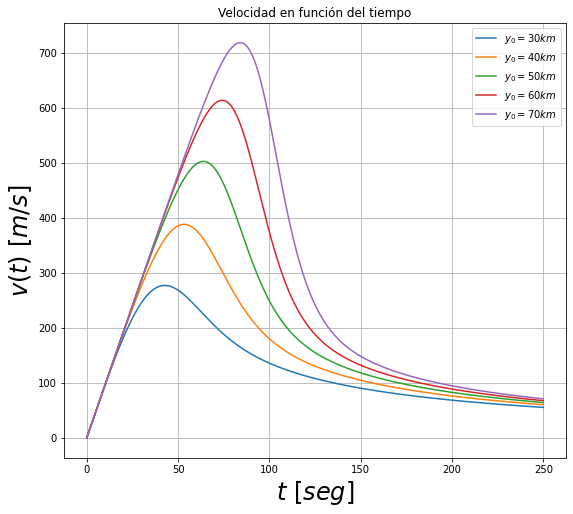

In [19]:

plt.figure(figsize=(9,8))
plt.title("Velocidad en función del tiempo") # Titulo de la gráfica

plt.plot(t , -v1 , label = "$y_0 = 30km $") # velocidad en funcion del tiempo para Y_0 = 30km
plt.plot(t , -v2 , label = "$y_0 = 40km $") # velocidad en funcion del tiempo para Y_0 = 40km
plt.plot(t , -v3 , label = "$y_0 = 50km $") # velocidad en funcion del tiempo para Y_0 = 50km
plt.plot(t , -v4 , label = "$y_0 = 60km $") # velocidad en funcion del tiempo para Y_0 = 60km
plt.plot(t , -v5 , label = "$y_0 = 70km $") # velocidad en funcion del tiempo para Y_0 = 70km


plt.xlabel("$t\ [seg]$" , fontsize = 24)    # nombre del eje x
plt.ylabel("$v(t)\ [m/s]$" , fontsize = 24) # nombre del eje y
plt.legend()
plt.grid()
plt.show()

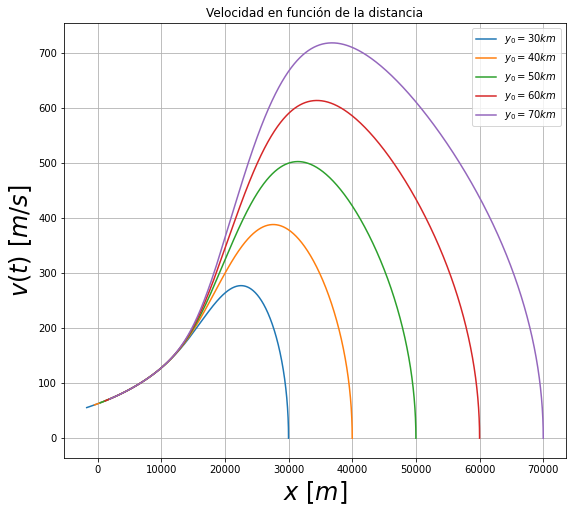

In [20]:
plt.figure(figsize=(9,8))
plt.title("Velocidad en función de la distancia") # Titulo de la gráfica

plt.plot(y1 , -v1 , label = "$y_0 = 30km $") # velocidad en funcion del tiempo para Y_0 = 30km
plt.plot(y2 , -v2 , label = "$y_0 = 40km $") # velocidad en funcion del tiempo para Y_0 = 40km
plt.plot(y3 , -v3 , label = "$y_0 = 50km $") # velocidad en funcion del tiempo para Y_0 = 50km
plt.plot(y4 , -v4 , label = "$y_0 = 60km $") # velocidad en funcion del tiempo para Y_0 = 60km
plt.plot(y5 , -v5 , label = "$y_0 = 70km $") # velocidad en funcion del tiempo para Y_0 = 70km

plt.xlabel("$x\ [m]$" , fontsize = 24)    # nombre del eje x
plt.ylabel("$v(t)\ [m/s]$" , fontsize = 24) # nombre del eje y
plt.legend()
plt.grid()
plt.show()